In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import numpy as  np
import matplotlib.pyplot as plt

In [4]:
total_datagen=ImageDataGenerator(rescale=1/255,zoom_range=0.1,horizontal_flip=True,rotation_range=10,brightness_range=[0.9,1.1])
total_generator=total_datagen.flow_from_directory(directory="/kaggle/input/chest-xray-covid19-pneumonia/Data/train",
                                                  classes=["NORMAL","PNEUMONIA"],
                                                  target_size=(224,224),
                                                  color_mode="rgb",
                                                  class_mode="categorical",
                                                  batch_size=32,
                                                  shuffle=True)

Found 4684 images belonging to 2 classes.


In [5]:
total_test_datagen=ImageDataGenerator(rescale=1/255)
total_test_generator=total_test_datagen.flow_from_directory(directory="/kaggle/input/chest-xray-covid19-pneumonia/Data/test",
                                                            classes=["NORMAL","PNEUMONIA"],
                                                            target_size=(224,224),
                                                            color_mode="rgb",
                                                            class_mode="categorical",
                                                            batch_size=32,
                                                            shuffle=True)

Found 1172 images belonging to 2 classes.


In [6]:
train_images,train_labels=next(total_generator)
test_images,test_labels=next(total_test_generator)

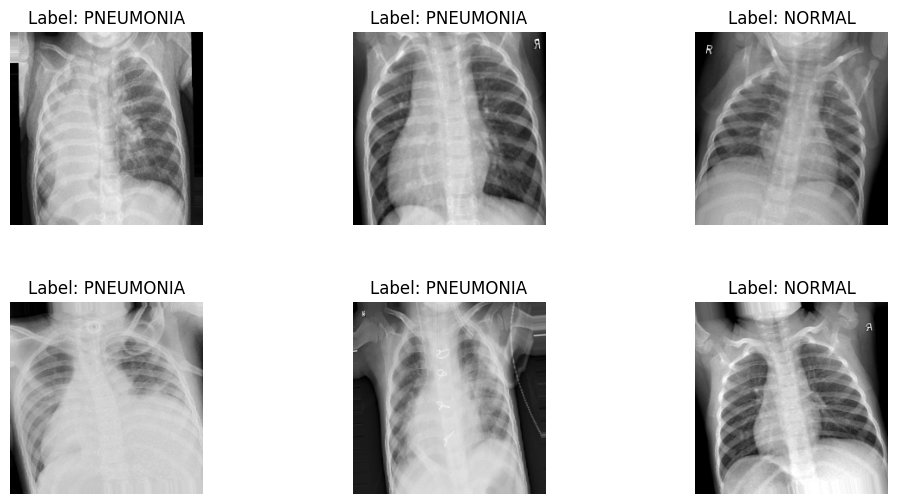

In [7]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(train_images[i])
    label_val = np.argmax(train_labels[i]) if train_labels.shape[-1] > 1 else train_labels[i]
    plt.title(f"Label: {'PNEUMONIA' if label_val == 1 else 'NORMAL'}")
    plt.axis('off')


In [20]:
from tensorflow.keras.layers import InputLayer,Dense,Conv2D,Dropout,MaxPool2D,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
model=tf.keras.models.Sequential([
    Conv2D(filters=64,kernel_size=(3,3),input_shape=[224,224,3]),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=128,kernel_size=(3,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=256,kernel_size=(3,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=256,kernel_size=(3,3)),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=128,activation="relu"),
    Dropout(0.2),
    Dense(units=64,activation="relu"),
    Dropout(0.2),
    Dense(units=2,activation="sigmoid"),
])


earlystopping=EarlyStopping(patience=10,restore_best_weights=True)



model.compile(loss="binary_crossentropy",optimizer='adam',metrics=["accuracy"])

history=model.fit(train_images,train_labels,epochs=100,callbacks=[earlystopping],validation_data=[test_images,test_labels],validation_split=0.33,batch_size=10)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5800 - loss: 1.7671 - val_accuracy: 0.8125 - val_loss: 6.0366
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3050 - loss: 11.2734 - val_accuracy: 0.8125 - val_loss: 0.5268
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5808 - loss: 0.8769 - val_accuracy: 0.8125 - val_loss: 0.5087
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6492 - loss: 2.5033 - val_accuracy: 0.8125 - val_loss: 0.7671
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6692 - loss: 1.6377 - val_accuracy: 0.1875 - val_loss: 0.8965
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4400 - loss: 0.9453 - val_accuracy: 0.8125 - val_loss: 0.5139
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6658 - loss: 0.7639 - val_accuracy: 0.1875 - val_loss: 1.4493
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4308 - loss: 1.1494 - val_accuracy: 0.1875 - val_loss: 0.8027
Epoch 9/100
4/4 ━━

In [9]:
y_pred=model.predict(test_images)
y_pred=(y_pred>=0.5)
y_pred
actual=(test_labels>=0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [10]:
#Lets calculate the error metrices
actual_data=test_labels
predicted_data=y_pred
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, accuracy_score



def error_metrices(actual_data,predicted_data):
    r2=r2_score(actual_data,predicted_data)
    accuracy=accuracy_score(actual_data,predicted_data)
    mae=mean_absolute_percentage_error(actual_data,predicted_data)
    mape=mean_absolute_error(actual_data,predicted_data)
    return r2,accuracy,mape,mae


r2,accuracy,mae,mape=error_metrices(actual_data,predicted_data)
accuracy

0.90625

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

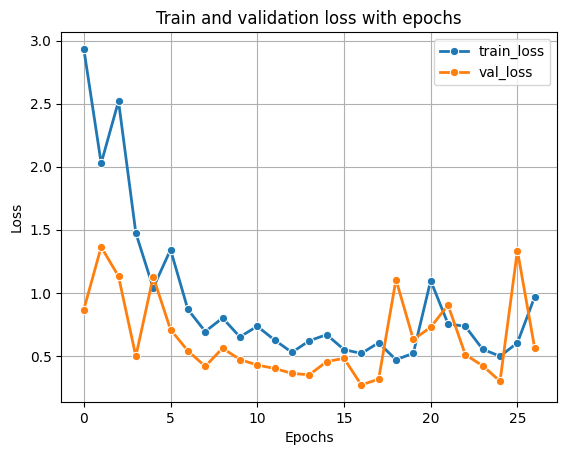

In [11]:
import seaborn as sns

sns.lineplot(history.history["loss"],label="train_loss",marker="o",linewidth=2)
sns.lineplot(history.history["val_loss"],label="val_loss",marker="o",linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and validation loss with epochs")
plt.grid(True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

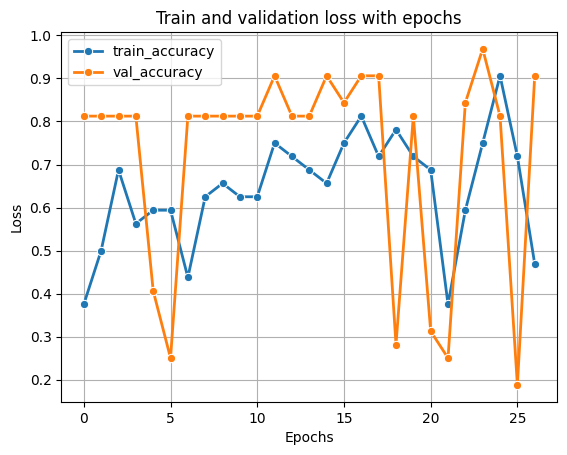

In [12]:

sns.lineplot(history.history["accuracy"],label="train_accuracy",marker="o",linewidth=2)
sns.lineplot(history.history["val_accuracy"],label="val_accuracy",marker="o",linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and validation loss with epochs")
plt.grid(True)

In [13]:
#Lets train using different models such as vgg16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam


In [14]:
base_model=VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
vgg_model=Sequential([
    base_model,
    Flatten(),
    Dense(256,activation="relu"),
    Dropout(0.2),
    Dense(2,activation="sigmoid")
])


optimizer_vgg=Adam(learning_rate=0.0001)
earlystopping_vgg=EarlyStopping(patience=10,restore_best_weights=True)
vgg_model.compile(loss="binary_crossentropy",optimizer=optimizer_vgg,metrics=["accuracy"])
vgg_history=vgg_model.fit(train_images,train_labels,validation_data=[test_images,test_labels],callbacks=[earlystopping],epochs=100,validation_split=0.33,batch_size=10)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 48s 10s/step - accuracy: 0.4142 - loss: 0.9464 - val_accuracy: 0.8125 - val_loss: 0.5179
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 10s/step - accuracy: 0.7258 - loss: 0.7840 - val_accuracy: 0.8125 - val_loss: 0.5347
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 10s/step - accuracy: 0.6283 - loss: 0.6853 - val_accuracy: 0.8125 - val_loss: 0.5950
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step - accuracy: 0.6267 - loss: 0.6515 - val_accuracy: 0.8125 - val_loss: 0.5419
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 11s/step - accuracy: 0.6283 - loss: 0.6562 - val_accuracy: 0.8125 - val_loss: 0.5369
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 11s/step - accuracy: 0.5858 - loss: 0.6801 - val_accuracy: 0.8125 - val_loss: 0.4921
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 11s/step - accuracy: 0.6758 - loss: 0.6388 - val_accuracy: 0.8125 - val_loss: 0.5195
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step - accuracy: 0.6958 - loss: 0.5968 - val_accuracy: 0.8125 - val_loss:

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

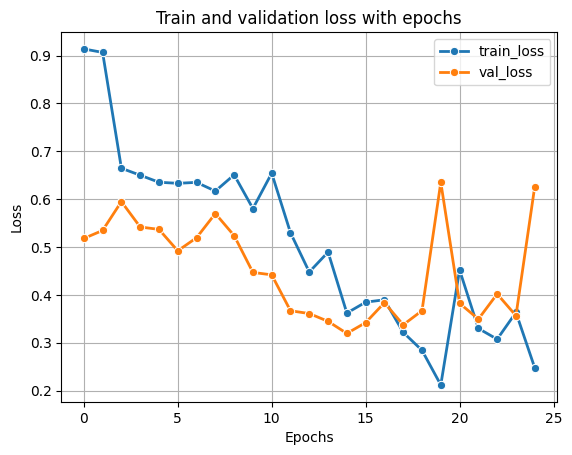

In [16]:
import seaborn as sns

sns.lineplot(vgg_history.history["loss"],label="train_loss",marker="o",linewidth=2)
sns.lineplot(vgg_history.history["val_loss"],label="val_loss",marker="o",linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and validation loss with epochs")
plt.grid(True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

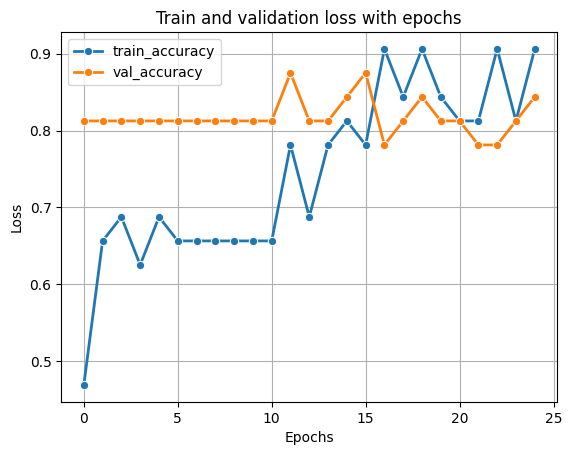

In [17]:
sns.lineplot(vgg_history.history["accuracy"],label="train_accuracy",marker="o",linewidth=2)
sns.lineplot(vgg_history.history["val_accuracy"],label="val_accuracy",marker="o",linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and validation loss with epochs")
plt.grid(True)

In [18]:
y_pred_vgg=vgg_model.predict(test_images)
y_pred_vgg=(y_pred>=0.5)
y_pred_vgg
actual=(test_labels>=0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


In [19]:
##Lets calculate the error metrices
actual_data_vgg=test_labels
predicted_data_vgg=y_pred_vgg
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, accuracy_score



def error_metrices(actual_data,predicted_data):
    r2=r2_score(actual_data,predicted_data)
    accuracy=accuracy_score(actual_data,predicted_data)
    mape=mean_absolute_percentage_error(actual_data,predicted_data)
    mae=mean_absolute_error(actual_data,predicted_data)
    return r2,accuracy,mape,mae


r2,accuracy,mae,mape=error_metrices(actual_data,predicted_data)
accuracy,r2,mae,mape

(0.90625, 0.3846153846153846, 211106230000000.0, 0.09375)

In [21]:
xception_image_datagen=ImageDataGenerator(rescale=1/255,
                                          rotation_range=10,
                                          zoom_range=0.1,
                                          brightness_range=[0.9,1.1],
                                          horizontal_flip=True,
                                          width_shift_range=0.1)

In [22]:
xception_train_image=xception_image_datagen.flow_from_directory(directory="/kaggle/input/chest-xray-covid19-pneumonia/Data/train",
                                                          classes=["NORMAL","COVID19"],
                                                          target_size=(299,299),
                                                          color_mode="rgb",
                                                          class_mode="categorical",
                                                          batch_size=32,
                                                          shuffle=True)

xception_test_image=xception_image_datagen.flow_from_directory(directory="/kaggle/input/chest-xray-covid19-pneumonia/Data/test",
                                                          classes=["NORMAL","COVID19"],
                                                          target_size=(299,299),
                                                          color_mode="rgb",
                                                          class_mode="categorical",
                                                          batch_size=32,
                                                          shuffle=True)
xception_train,xception_train_labels=next(xception_train_image)
xception_test ,xception_test_labels=next(xception_test_image)

Found 1726 images belonging to 2 classes.
Found 433 images belonging to 2 classes.


In [23]:
from tensorflow.keras.applications import Xception
xception_model=Xception(weights="imagenet",include_top=False,input_shape=(299,299,3))
xception=Sequential([
    xception_model,
    
    Flatten(),
    Dense(256,activation="relu"),
    Dropout(0.2),
    Dense(2,activation="sigmoid")
    
])

optimizer_xception=Adam(learning_rate=0.0001)
earlystopping_xception=EarlyStopping(patience=10,restore_best_weights=True)
xception.compile(loss="binary_crossentropy",optimizer=optimizer_xception,metrics=["accuracy"])
xception_history=xception.fit(xception_train,xception_train_labels,validation_data=[xception_test,xception_test_labels],callbacks=[earlystopping_xception],epochs=100,batch_size=10)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 87s 10s/step - accuracy: 0.6475 - loss: 0.6546 - val_accuracy: 1.0000 - val_loss: 0.0234
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 51s 14s/step - accuracy: 0.9017 - loss: 0.3331 - val_accuracy: 0.9688 - val_loss: 0.2858
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 46s 11s/step - accuracy: 0.9750 - loss: 0.1926 - val_accuracy: 0.9688 - val_loss: 0.3737
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 9s/step - accuracy: 0.9875 - loss: 0.0762 - val_accuracy: 0.9688 - val_loss: 0.1605
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 9s/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0081
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step - accuracy: 0.9425 - loss: 0.1496 - val_accuracy: 1.0000 - val_loss: 0.0270
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 11s/step - accuracy: 0.9508 - loss: 0.0861 - val_accuracy: 1.0000 - val_loss: 0.0080
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 11s/step - accuracy: 1.0000 

In [24]:
y_pred_xception=xception_model.predict(xception_test)
y_pred_xception=(y_pred>=0.5)
y_pred_xception
actual=(test_labels>=0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


In [25]:
actual_data_xception=test_labels
predicted_data_vgg=y_pred_vgg
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, accuracy_score



def error_metrices(actual_data,predicted_data):
    r2=r2_score(actual_data,predicted_data)
    accuracy=accuracy_score(actual_data,predicted_data)
    mape=mean_absolute_percentage_error(actual_data,predicted_data)
    mae=mean_absolute_error(actual_data,predicted_data)
    return r2,accuracy,mape,mae


r2,accuracy,mae,mape=error_metrices(actual_data,predicted_data)
accuracy,r2,mae,mape

(0.90625, 0.3846153846153846, 211106230000000.0, 0.09375)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

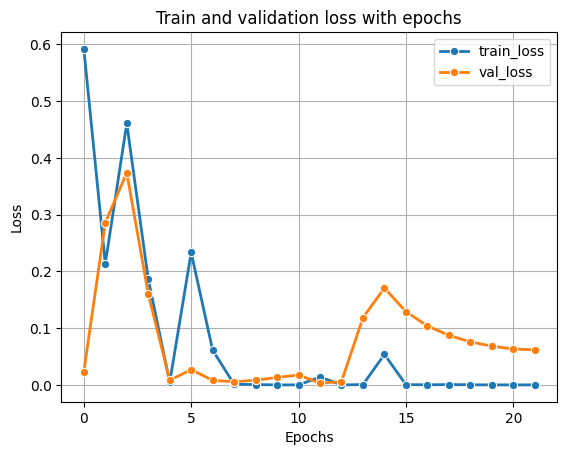

In [26]:
import seaborn as sns

sns.lineplot(xception_history.history["loss"],label="train_loss",marker="o",linewidth=2)
sns.lineplot(xception_history.history["val_loss"],label="val_loss",marker="o",linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and validation loss with epochs")
plt.grid(True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

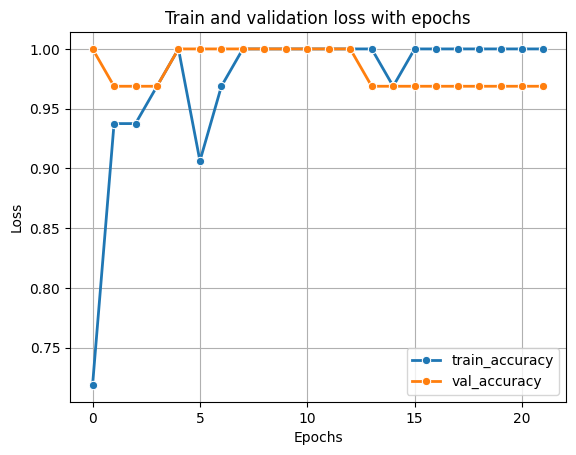

In [27]:

sns.lineplot(xception_history.history["accuracy"],label="train_accuracy",marker="o",linewidth=2)
sns.lineplot(xception_history.history["val_accuracy"],label="val_accuracy",marker="o",linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and validation loss with epochs")
plt.grid(True)